In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

## upload autocorrelation function data
home = "/scratch/yc3400/AffineInvariant/"
folder1 = "benchmark_results_Gaussian_sample10_5_20250424-123734/"
folder2 = "benchmark_results_Gaussian_sample10_5_20250424-173028/"

dim1 = ['4','8','16','32','64']
dim2 = ['128']

names = ["Stretch Move", "Side Move", 
        "HMC n=2", "HMC n=10", 
        "Hamiltonian Walk Move n=10", "Hamiltonian Walk Move n=2",
        "Hamiltonian Side Move n=10", "Hamiltonian Side Move n=2"]

In [18]:
dict = {}

for dim in dim1:
    dict[dim]={}
    for name in names:
        tmp = "acf_" + name + ".npy"
        dict[dim][name] = np.load(home+folder1+dim+'/' + tmp)

for dim in dim2:
    dict[dim]={}
    for name in names:
        tmp = "acf_" + name + ".npy"
        dict[dim][name] = np.load(home+folder2+dim+'/' + tmp)


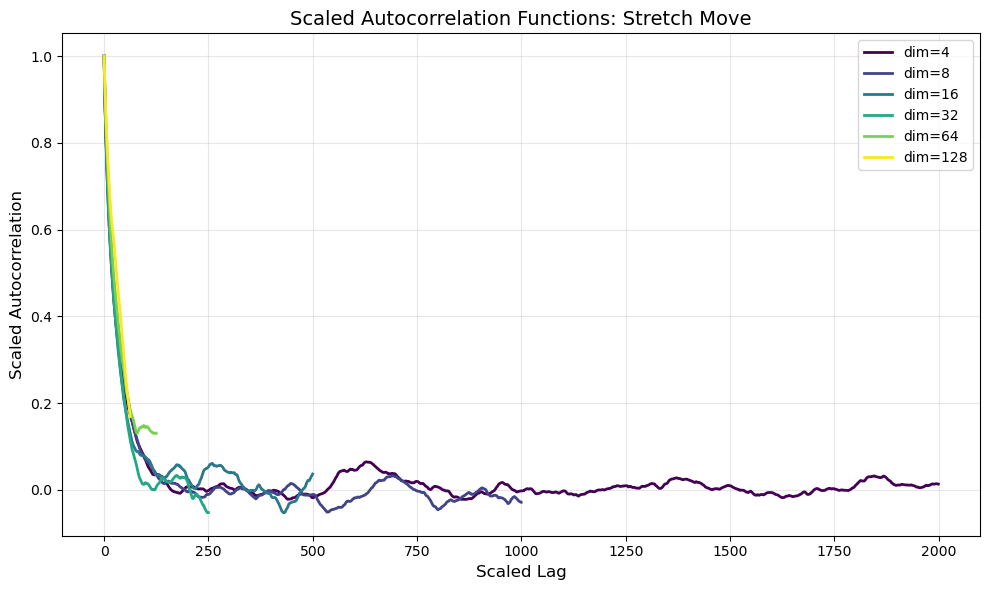

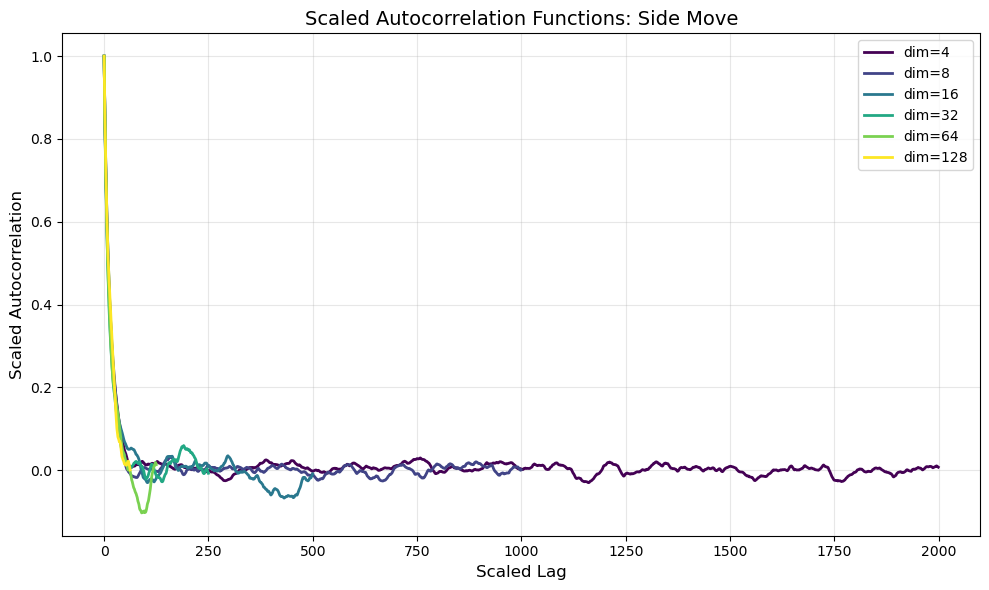

In [22]:
"""Plot autocorrelation functions for different dimensions and samplers"""
# Set up consistent colors for dimensions
dims = dim1 + dim2
colors = plt.cm.viridis(np.linspace(0, 1, len(dims)))

# Plot for Stretch Move
plt.figure(figsize=(10, 6))
for i, dim in enumerate(dims):
    acf = dict[dim]["Stretch Move"]
    max_lag = len(acf)
    plt.plot(np.arange(max_lag)/int(dim)*4, acf[:max_lag], 
             label=f"dim={dim}", color=colors[i], linewidth=2)

plt.xlabel("Scaled Lag", fontsize=12)
plt.ylabel("Scaled Autocorrelation", fontsize=12)
plt.title("Scaled Autocorrelation Functions: Stretch Move", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig("stretch_move_autocorrelation.png", dpi=300)

# Plot for Side Move
plt.figure(figsize=(10, 6))
for i, dim in enumerate(dims):
    acf = dict[dim]["Side Move"]
    max_lag = len(acf)
    plt.plot(np.arange(max_lag)/int(dim)*4, acf[:max_lag], 
             label=f"dim={dim}", color=colors[i], linewidth=2)

plt.xlabel("Scaled Lag", fontsize=12)
plt.ylabel("Scaled Autocorrelation", fontsize=12)
plt.title("Scaled Autocorrelation Functions: Side Move", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig("side_move_autocorrelation.png", dpi=300)



In [ ]:
# Create a summary plot of integrated autocorrelation times
plt.figure(figsize=(10, 6))
tau_stretch = []
tau_side = []

for dim in dims:
    # Calculate integrated autocorrelation time
    try:
        tau_s, _, _ = integrated_autocorr_time(stretch_results[dim]["autocorrelation"])
        tau_stretch.append(tau_s)
    except:
        tau_stretch.append(np.nan)
        
    try:
        tau_d, _, _ = integrated_autocorr_time(side_results[dim]["autocorrelation"])
        tau_side.append(tau_d)
    except:
        tau_side.append(np.nan)

plt.plot(dims, tau_stretch, 'o-', label="Stretch Move", linewidth=2)
plt.plot(dims, tau_side, 's-', label="Side Move", linewidth=2)
plt.xlabel("Dimension", fontsize=12)
plt.ylabel("Integrated Autocorrelation Time", fontsize=12)
plt.title("Integrated Autocorrelation Time vs. Dimension", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xscale('log', base=2)
plt.yscale('log')
plt.tight_layout()
# plt.savefig("integrated_autocorrelation_comparison.png", dpi=300)




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from autocorrelation_func import autocorrelation_fft, integrated_autocorr_time

## upload autocorrelation function data
home = "/scratch/yc3400/AffineInvariant/"
folder1 = "benchmark_results_Gaussian_sample10_5_20250424-123734/"
folder2 = "benchmark_results_Gaussian_sample10_5_20250424-173028/"

dim1 = ['4','8','16','32','64']
dim2 = ['128']

names = ["Stretch Move", "Side Move", 
        "HMC n=2", "HMC n=10", 
        "Hamiltonian Walk Move n=10", "Hamiltonian Walk Move n=2",
        "Hamiltonian Side Move n=10", "Hamiltonian Side Move n=2"]

dict = {}

for dim in dim1:
    print(dim)
    dict[dim]={}
    for name in names:
        print(name)
        tmp = "samples_" + name + ".npy"
        samples = np.load(home+folder1+dim+'/' + tmp)
        dict[dim][name] = {}
        dict[dim][name]["acf"] = autocorrelation_fft(np.mean(samples[:, :, 0], axis=0))
        dict[dim][name]["act"], _, _ = integrated_autocorr_time(np.mean(samples[:, :, 0],axis=0))

for dim in dim2:
    print(dim)
    dict[dim]={}
    for name in names:
        print(name)
        tmp = "samples_" + name + ".npy"
        samples = np.load(home+folder2+dim+'/' + tmp)
        dict[dim][name] = {}
        dict[dim][name]["acf"] = autocorrelation_fft(np.mean(samples[:, :, 0], axis=0))
        dict[dim][name]["act"], _, _ = integrated_autocorr_time(np.mean(samples[:, :, 0],axis=0))


4
Stretch Move
Side Move
HMC n=2
HMC n=10
Hamiltonian Walk Move n=10
Hamiltonian Walk Move n=2


/home/yc3400/scratch_research/gitrepo/AffineInvariantSamplers/autocorrelation_func.py:28: RuntimeWarning: divide by zero encountered in divide
  x_norm = x_norm / np.sqrt(var)
/home/yc3400/scratch_research/gitrepo/AffineInvariantSamplers/autocorrelation_func.py:33: RuntimeWarning: invalid value encountered in multiply
  acf = np.fft.ifft(fft * np.conjugate(fft))[:n]


Hamiltonian Side Move n=10
Hamiltonian Side Move n=2
8
Stretch Move
Side Move
HMC n=2
HMC n=10
Hamiltonian Walk Move n=10
Hamiltonian Walk Move n=2
Hamiltonian Side Move n=10
Hamiltonian Side Move n=2
16
Stretch Move
Side Move
HMC n=2
HMC n=10
Hamiltonian Walk Move n=10


/home/yc3400/scratch_research/gitrepo/AffineInvariantSamplers/autocorrelation_func.py:28: RuntimeWarning: invalid value encountered in divide
  x_norm = x_norm / np.sqrt(var)


Hamiltonian Walk Move n=2
Hamiltonian Side Move n=10
Hamiltonian Side Move n=2
32
Stretch Move
Side Move
HMC n=2
HMC n=10
Hamiltonian Walk Move n=10
Hamiltonian Walk Move n=2
Hamiltonian Side Move n=10
Hamiltonian Side Move n=2
64
Stretch Move
Side Move
HMC n=2
HMC n=10
Hamiltonian Walk Move n=10
Hamiltonian Walk Move n=2
Hamiltonian Side Move n=10
Hamiltonian Side Move n=2
128
Stretch Move
Side Move
HMC n=2
HMC n=10
Hamiltonian Walk Move n=10
Hamiltonian Walk Move n=2
Hamiltonian Side Move n=10
Hamiltonian Side Move n=2


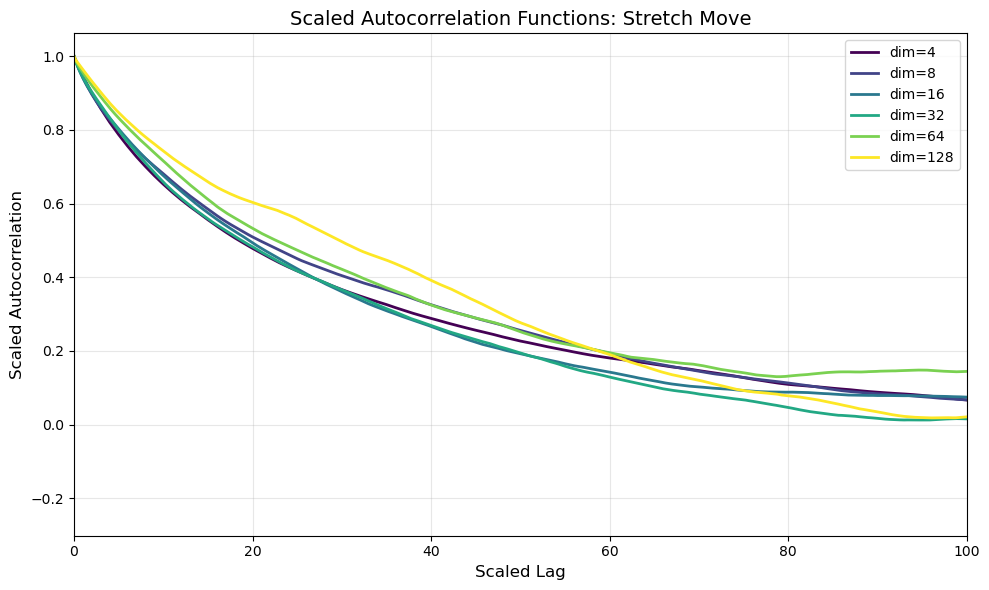

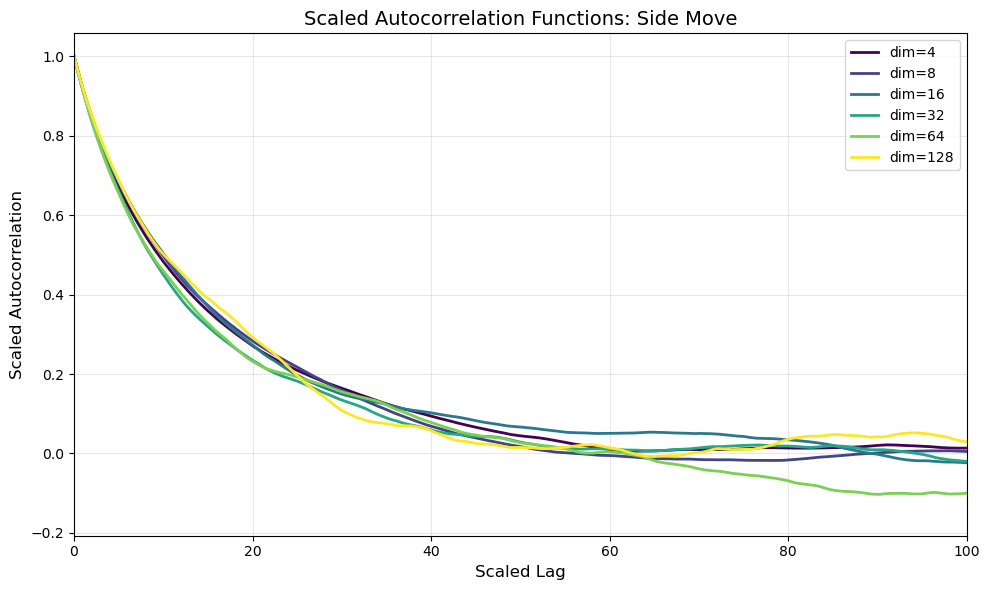

In [8]:
"""Plot autocorrelation functions for different dimensions and samplers"""
# Set up consistent colors for dimensions
dims = dim1 + dim2
colors = plt.cm.viridis(np.linspace(0, 1, len(dims)))

# Plot for Stretch Move
plt.figure(figsize=(10, 6))
for i, dim in enumerate(dims):
    acf = dict[dim]["Stretch Move"]["acf"]
    max_lag = len(acf)
    plt.plot(np.arange(max_lag)/int(dim)*4, acf[:max_lag], 
             label=f"dim={dim}", color=colors[i], linewidth=2)
    plt.xlim(0, 100)

plt.xlabel("Scaled Lag", fontsize=12)
plt.ylabel("Scaled Autocorrelation", fontsize=12)
plt.title("Scaled Autocorrelation Functions: Stretch Move", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig("stretch_move_autocorrelation.png", dpi=300)

# Plot for Side Move
plt.figure(figsize=(10, 6))
for i, dim in enumerate(dims):
    acf = dict[dim]["Side Move"]["acf"]
    max_lag = len(acf)
    plt.plot(np.arange(max_lag)/int(dim)*4, acf[:max_lag], 
             label=f"dim={dim}", color=colors[i], linewidth=2)
    plt.xlim(0, 100)
    
plt.xlabel("Scaled Lag", fontsize=12)
plt.ylabel("Scaled Autocorrelation", fontsize=12)
plt.title("Scaled Autocorrelation Functions: Side Move", fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
# plt.savefig("side_move_autocorrelation.png", dpi=300)



In [9]:
dims

['4', '8', '16', '32', '64', '128']

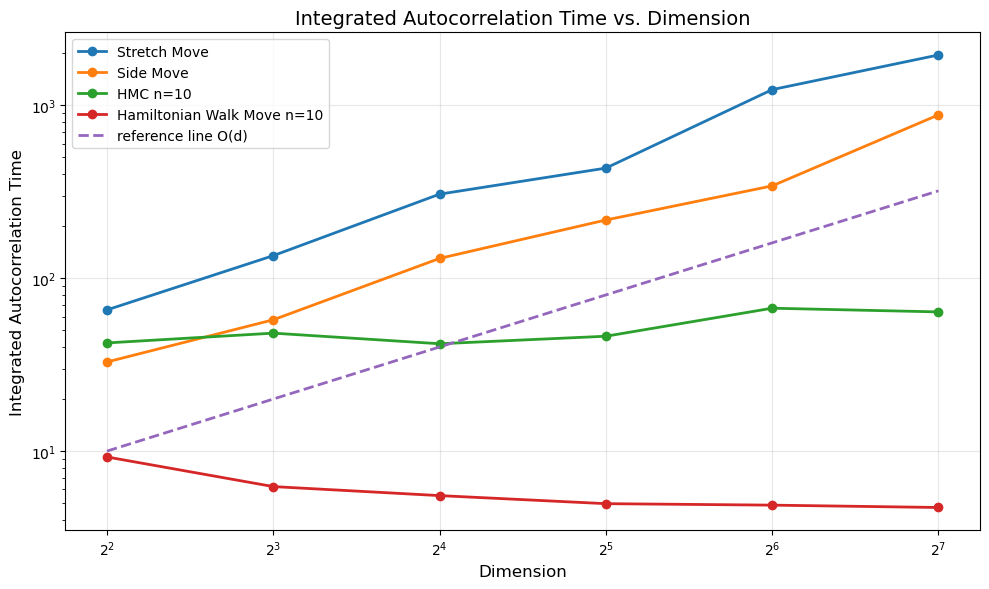

In [10]:
# Create a summary plot of integrated autocorrelation times
plt.figure(figsize=(10, 6))

names = ["Stretch Move", "Side Move", 
        "HMC n=10", 
        "Hamiltonian Walk Move n=10"]
dims_int = [int(dim) for dim in dims]
for name in names:
    act = np.zeros(len(dims))
    for i, dim in enumerate(dims):
        act[i] = dict[dim][name]["act"]
    
    plt.plot(dims_int, act, 'o-', label=name, linewidth=2)
    plt.xlabel("Dimension", fontsize=12)
    plt.ylabel("Integrated Autocorrelation Time", fontsize=12)
    plt.title("Integrated Autocorrelation Time vs. Dimension", fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.tight_layout()

ref = [10, 20, 40, 80, 160, 320]
plt.plot(dims_int, ref, '--', label='reference line O(d)', linewidth=2)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.xscale('log', base=2)
plt.yscale('log')
plt.tight_layout()

# plt.savefig("integrated_autocorrelation_comparison.png", dpi=300)




In [7]:
dim1 + dim2

['4', '8', '16', '32', '64', '128']

[4, 8, 16, 32, 64]